# Working With A SQLite Database - 1

## Objective

Working with Pandas and the SQLite library to connect the database, extract data, and perform analysis on the data.

## Database

The Database contains information on airlines, airports, and routes between airports. Each route represents a repeated flight that an airline flies between a source and a destination airport.

All of the data is in a SQLite database called flights.db, which contain three tables -- **airports**, **airlines**, and **routes**.

Here are two rows from **airlines** table:

|    | id | name                   | alias | iata | icao | callsign | country  | active |
|----|----|------------------------|-------|------|------|----------|----------|--------|
| 10 | 11 | 4D Air                 | \N    | NaN  | QRT  | QUARTET  | Thailand | N      |
| 11 | 12 | 611897 Alberta Limited | \N    | NaN  | THD  | DONUT    | Canada   | N      |

Here are two rows from **airports** table:

|   | id | name   | city   | country          | code | icao | latitude   | longitude   | altitude | offset | dst | timezone             |
|---|----|--------|--------|------------------|------|------|------------|-------------|----------|--------|-----|----------------------|
| 0 | 1  | Goroka | Goroka | Papua New Guinea | GKA  | AYGA | -6.081.689 | 145.391.881 | 5282     | 10     | U   | Pacific/Port_Moresby |
| 1 | 2  | Madang | Madang | Papua New Guinea | MAG  | AYMD | -5.207.083 | 1.457.887   | 20       | 10     | U   | Pacific/Port_Moresby |

Here are two rows from **routes** table:

|   | airline | airline_id | source | source_id | dest | dest_id | codeshare | stops | equipment |
|---|---------|------------|--------|-----------|------|---------|-----------|-------|-----------|
| 0 | 2B      | 410        | AER    | 2965      | KZN  | 2990    | NaN       | 0     | CR2       |
| 1 | 2B      | 410        | ASF    | 2966      | KZN  | 2990    | NaN       | 0     | CR2       |

## Using Pandas with SQLite

In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('flights.db')

df = pd.read_sql_query("SELECT * FROM airlines LIMIT 5;", conn)
df

,index,id,name,alias,iata,icao,callsign,country,active
0,0,1,Private flight,\N,-,None,None,None,Y
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,3,4,2 Sqn No 1 Elementary Flying Training School,\N,None,WYT,None,United Kingdom,N
4,4,5,213 Flight Unit,\N,None,TFU,None,Russia,N


## Mapping Routes

Create a map of every airline route in the world.

In [2]:
routes = pd.read_sql_query("""
                           SELECT cast(sa.longitude as float) as source_lon, 
                           cast(sa.latitude as float) as source_lat,
                           cast(da.longitude as float) as dest_lon,
                           cast(da.latitude as float) as dest_lat
                           FROM routes 
                           INNER JOIN airports sa ON
                           sa.id = routes.source_id
                           INNER JOIN airports da ON
                           da.id = routes.dest_id;
                           """, 
                           conn)
routes

,source_lon,source_lat,dest_lon,dest_lat
0,39.956589,43.449928,49.278728,55.606186
1,48.006278,46.283333,49.278728,55.606186
2,48.006278,46.283333,43.081889,44.225072
3,61.503333,55.305836,49.278728,55.606186
4,61.503333,55.305836,82.650656,55.012622
5,37.906111,55.408611,49.278728,55.606186
6,37.906111,55.408611,52.060000,55.340000
7,37.906111,55.408611,52.801700,54.640000
8,36.590100,50.643800,20.592633,54.890050
9,36.590100,50.643800,49.278728,55.606186


Setup the map:

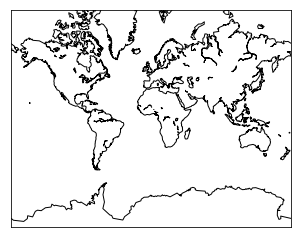

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()

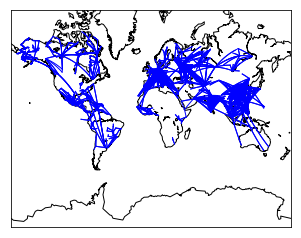

In [5]:
for name, row in routes[:3000].iterrows():
    if abs(row["source_lon"] - row["dest_lon"]) < 90:
        # Draw a great circle between source and dest airports.
        m.drawgreatcircle(
            row["source_lon"], 
            row["source_lat"], 
            row["dest_lon"],
            row["dest_lat"],
            linewidth=1,
            color='b'
        )
m.drawcoastlines()